In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print ('done')

done


In [3]:
# This line reads the dataset and turns into a dataframe

data = pd.read_csv('../local_data/TB_Burden_Country.csv')
new_data = pd.DataFrame(data)

In [5]:
new_data

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
0,Afghanistan,AF,AFG,4,EMR,1990,11731193,306.0,156.0,506.0,...,0.11,0.08,0.14,12.0,9.4,16.0,NaN,20.0,15.0,24.0
1,Afghanistan,AF,AFG,4,EMR,1991,12612043,343.0,178.0,562.0,...,0.13,0.11,0.16,17.0,14.0,20.0,NaN,96.0,80.0,110.0
2,Afghanistan,AF,AFG,4,EMR,1992,13811876,371.0,189.0,614.0,...,0.16,0.14,0.18,22.0,19.0,24.0,NaN,NaN,NaN,NaN
3,Afghanistan,AF,AFG,4,EMR,1993,15175325,392.0,194.0,657.0,...,0.19,0.17,0.21,28.0,25.0,31.0,NaN,NaN,NaN,NaN
4,Afghanistan,AF,AFG,4,EMR,1994,16485018,410.0,198.0,697.0,...,0.21,0.18,0.24,35.0,30.0,39.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,Zimbabwe,ZW,ZWE,716,AFR,2009,12888918,449.0,258.0,692.0,...,511.00,460.00,566.00,66000.0,59000.0,73000.0,NaN,50.0,45.0,54.0
5116,Zimbabwe,ZW,ZWE,716,AFR,2010,13076978,415.0,239.0,639.0,...,487.00,433.00,545.00,64000.0,57000.0,71000.0,NaN,53.0,48.0,59.0
5117,Zimbabwe,ZW,ZWE,716,AFR,2011,13358738,417.0,241.0,639.0,...,448.00,403.00,502.00,60000.0,54000.0,67000.0,NaN,48.0,43.0,53.0
5118,Zimbabwe,ZW,ZWE,716,AFR,2012,13724317,425.0,245.0,654.0,...,411.00,362.00,471.00,56000.0,50000.0,65000.0,NaN,45.0,40.0,52.0


In [53]:
###########################
###### Duplicate data #####
###########################

# This function finds rows with duplicate data, and drops them.

def tb_duplicates(new_data):
    duplicate_data = new_data.duplicated()
    undupe_data = duplicate_data.drop(0, axis = 0, inplace = False)
    return undupe_data

print(tb_duplicates(new_data))

#print(type(duplicate_data))

1       False
2       False
3       False
4       False
5       False
        ...  
5115    False
5116    False
5117    False
5118    False
5119    False
Length: 5119, dtype: bool


In [55]:
#########################
###### Mising data ######
#########################

#This function drops missing values from rows

def tb_missing_rows(new_data):
    missing_data = new_data[new_data.isna().any(axis=1)]
    new_rows = missing_data.drop(0, axis = 0, inplace = False)
    return new_rows
print(tb_missing_rows(new_data))

     Country or territory name ISO 2-character country/territory code  \
1                  Afghanistan                                     AF   
2                  Afghanistan                                     AF   
3                  Afghanistan                                     AF   
4                  Afghanistan                                     AF   
5                  Afghanistan                                     AF   
...                        ...                                    ...   
5115                  Zimbabwe                                     ZW   
5116                  Zimbabwe                                     ZW   
5117                  Zimbabwe                                     ZW   
5118                  Zimbabwe                                     ZW   
5119                  Zimbabwe                                     ZW   

     ISO 3-character country/territory code  \
1                                       AFG   
2                            

In [57]:
#######################
###### Null data ######
#######################

def null_value(new_data):
    null_data = new_data.isnull().sum()
    remove_null = null_data.dropna(axis = 0, inplace = False)
    return remove_null
print(null_value(new_data))

Country or territory name                                                                            0
ISO 2-character country/territory code                                                              24
ISO 3-character country/territory code                                                               0
ISO numeric country/territory code                                                                   0
Region                                                                                               0
Year                                                                                                 0
Estimated total population number                                                                    0
Estimated prevalence of TB (all forms) per 100 000 population                                        0
Estimated prevalence of TB (all forms) per 100 000 population, low bound                            20
Estimated prevalence of TB (all forms) per 100 000 population, high bound

In [123]:
########################
##### Outlier data #####
########################

# This function serves to remove outlier data.

def outlier_data(new_data: object, column: str) -> 'str':
     
    z_score = np.abs((new_data[column] - new_data[column].mean() / new_data[column].std()))
    outliers = new_data[(z_score<2)]
    return outliers
print('done')



done


In [125]:
death_outliers = outlier_data(new_data, 'Estimated number of deaths from TB (all forms, excluding HIV)')
print(type(death_outliers))
print('this is the shape: ', death_outliers.shape)

<class 'pandas.core.frame.DataFrame'>
this is the shape:  (695, 47)


In [15]:
#########################
###### Data stats #######
#########################

# description of all data.

new_data.describe(include = 'all')

,Country or territory name,ISO 2-character country/territory code,ISO 3-character country/territory code,ISO numeric country/territory code,Region,Year,Estimated total population number,Estimated prevalence of TB (all forms) per 100 000 population,"Estimated prevalence of TB (all forms) per 100 000 population, low bound","Estimated prevalence of TB (all forms) per 100 000 population, high bound",...,Estimated incidence of TB cases who are HIV-positive per 100 000 population,"Estimated incidence of TB cases who are HIV-positive per 100 000 population, low bound","Estimated incidence of TB cases who are HIV-positive per 100 000 population, high bound",Estimated incidence of TB cases who are HIV-positive,"Estimated incidence of TB cases who are HIV-positive, low bound","Estimated incidence of TB cases who are HIV-positive, high bound",Method to derive TBHIV estimates,"Case detection rate (all forms), percent","Case detection rate (all forms), percent, low bound","Case detection rate (all forms), percent, high bound"
count,5120,5096,5120,5120.000000,5120,5120.000000,5.120000e+03,5120.000000,5100.000000,5100.000000,...,3645.000000,3642.000000,3642.000000,3645.000000,3642.000000,3642.000000,0.0,4671.000000,4671.000000,4671.000000
unique,219,218,219,NaN,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,AF,AFG,NaN,EUR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,24,24,24,NaN,1281,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,433.576563,NaN,2001.549023,2.915671e+07,194.386100,101.815353,321.006367,...,40.228274,33.892320,47.326378,6095.426979,5215.147573,7363.644445,NaN,68.217851,61.959409,75.854492
std,NaN,NaN,NaN,255.116018,NaN,6.933272,1.183725e+08,259.016385,145.259349,421.326139,...,125.175567,105.557348,147.004849,22807.804792,19993.703601,26548.834113,NaN,25.465391,23.603155,29.277633
min,NaN,NaN,NaN,4.000000,NaN,1990.000000,1.129000e+03,0.000000,0.110000,0.770000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,212.000000,NaN,1996.000000,5.601190e+05,23.000000,10.000000,43.000000,...,0.190000,0.130000,0.240000,18.000000,12.000000,25.000000,NaN,52.000000,46.000000,59.000000
50%,NaN,NaN,NaN,430.000000,NaN,2002.000000,5.172118e+06,85.000000,40.000000,147.000000,...,2.100000,1.700000,2.600000,170.000000,130.000000,220.000000,NaN,75.000000,68.000000,82.000000
75%,NaN,NaN,NaN,646.000000,NaN,2008.000000,1.752404e+07,272.000000,139.000000,447.000000,...,14.000000,12.000000,17.000000,1700.000000,1400.000000,2000.000000,NaN,87.000000,77.000000,95.000000


In [17]:
# data types description, and data columns

new_data.dtypes

Country or territory name                                                                          object
ISO 2-character country/territory code                                                             object
ISO 3-character country/territory code                                                             object
ISO numeric country/territory code                                                                  int64
Region                                                                                             object
Year                                                                                                int64
Estimated total population number                                                                   int64
Estimated prevalence of TB (all forms) per 100 000 population                                     float64
Estimated prevalence of TB (all forms) per 100 000 population, low bound                          float64
Estimated prevalence of TB (all forms) per 100

In [25]:
# (Estimated) TB rates per region
grouped_data = new_data.groupby('Region')['Estimated prevalence of TB (all forms)'].apply(list)
grouped_data

Region
AFR    [26000.0, 27000.0, 27000.0, 29000.0, 31000.0, ...
AMR    [5.0, 4.8, 4.7, 4.7, 4.7, 4.7, 4.9, 5.1, 5.4, ...
EMR    [36000.0, 43000.0, 51000.0, 59000.0, 68000.0, ...
EUR    [1200.0, 1200.0, 1200.0, 1100.0, 1100.0, 1100....
SEA    [540000.0, 550000.0, 560000.0, 570000.0, 58000...
WPR    [22.0, 5.4, 4.7, 8.2, 8.8, 11.0, 14.0, 16.0, 5...
Name: Estimated prevalence of TB (all forms), dtype: object

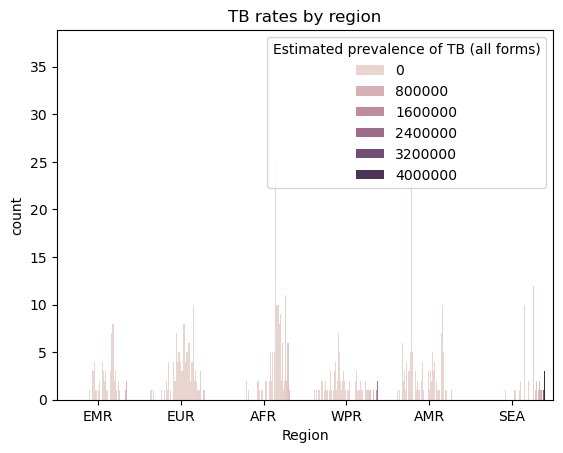

In [33]:
#########################
###### Data visuals######
#########################

# This section will present graphs based on different variables
sns.countplot(x = 'Region' ,hue = 'Estimated prevalence of TB (all forms)', data = new_data)
plt.title('TB rates by region')
plt.show()

AttributeError: 'Axes' object has no attribute 'limit'

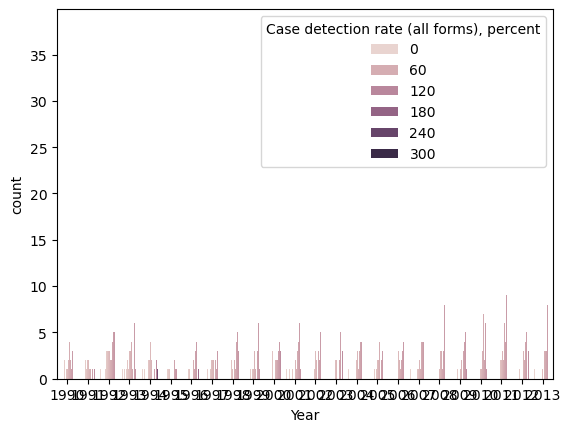

In [121]:

p = sns.countplot(x = 'Year', hue = 'Case detection rate (all forms), percent', data = new_data)
p.limit(y=(0, 10))
plt.title('detection rates per year')
plt.show()
